In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import copy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [4]:
wrs = pickle.load(open("../data/rbs_career.pkl","rb"))

In [6]:
value_inputs = wrs[["Rush","Yds_x","TD_x","Fmb","G_x"]]


value_inputs["Value"] = (value_inputs["Yds_x"] + 50 * (value_inputs["TD_x"] - 0.5 * value_inputs["Fmb"])) / (0.5 * value_inputs["G_x"])
y = value_inputs["Value"]
X = wrs.loc[:,"Att":"Conf"]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.8, random_state=29)
X_train.fillna(12, inplace = True)
X_test.fillna(12, inplace = True)

/home/leaferickson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/leaferickson/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


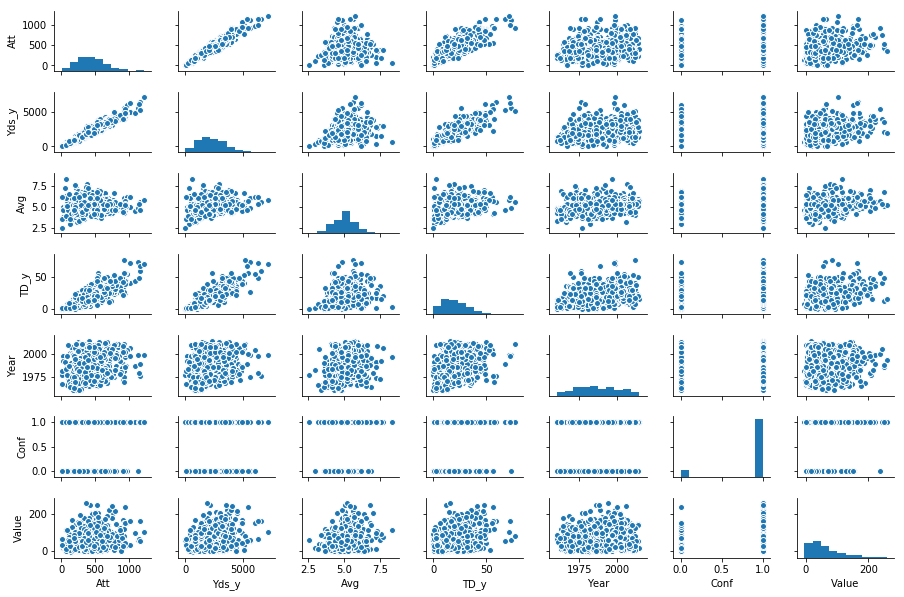

In [7]:
data = X_train.merge(pd.DataFrame(y_train), left_index = True, right_index = True)
data = data.dropna()
sns.pairplot(data, size = 1.2, aspect=1.5);

In [8]:
lm = smf.ols('Value ~ Yds_y + TD_y + Att + Avg + Year + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     19.38
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           9.97e-21
Time:                        23:06:35   Log-Likelihood:                -3239.6
No. Observations:                 613   AIC:                             6493.
Df Residuals:                     606   BIC:                             6524.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      372.4259    306.346      1.216      0.225    -229.203     974.055
Conf[T.True]     9.8175      6.263      1.567      0.118      -2.483      22.118
Yds_y            0.0310      0.013      2.401      0.017       0.006       0.056
TD_y             1.2279      0.291      4.219      0.000       0.656       1.799
Att             -0.1587      0.065     -2.437      0.015      -0.287      -0.031
Avg              1.5895      5.261      0.302      0.763      -8.743      11.922
Year            -0.1773      0.155     -1.142      0.254      -0.482       0.128
==============================================================================
Omnibus:                       84.187   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.217
Skew:                           0.962   Prob(JB):                     7.86e-27
Kurtosis:                       4.004   Cond. No.                     5.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
lm = smf.ols('Value ~ Yds_y + TD_y + Att + Year + Conf', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     23.27
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           2.04e-21
Time:                        23:08:15   Log-Likelihood:                -3239.6
No. Observations:                 613   AIC:                             6491.
Df Residuals:                     607   BIC:                             6518.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      371.4186    306.099      1.213      0.225    -229.722     972.559
Conf[T.True]     9.8655      6.257      1.577      0.115      -2.422      22.153
Yds_y            0.0343      0.007      4.991      0.000       0.021       0.048
TD_y             1.2289      0.291      4.226      0.000       0.658       1.800
Att             -0.1753      0.035     -5.071      0.000      -0.243      -0.107
Year            -0.1728      0.154     -1.119      0.264      -0.476       0.131
==============================================================================
Omnibus:                       84.295   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.477
Skew:                           0.962   Prob(JB):                     6.90e-27
Kurtosis:                       4.008   Cond. No.                     5.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
lm = smf.ols('Value ~ Yds_y + TD_y + Att + Conf + Att * Year', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     20.18
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           1.42e-21
Time:                        01:12:35   Log-Likelihood:                -3237.5
No. Observations:                 613   AIC:                             6489.
Df Residuals:                     606   BIC:                             6520.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -863.8107    679.784     -1.271      0.204   -2198.829     471.208
Conf[T.True]     8.3984      6.282      1.337      0.182      -3.939      20.736
Yds_y            0.0344      0.007      5.026      0.000       0.021       0.048
TD_y             1.2613      0.290      4.342      0.000       0.691       1.832
Att              2.7001      1.414      1.909      0.057      -0.077       5.477
Year             0.4497      0.343      1.312      0.190      -0.223       1.123
Att:Year        -0.0014      0.001     -2.034      0.042      -0.003   -4.97e-05
==============================================================================
Omnibus:                       84.840   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.550
Skew:                           0.966   Prob(JB):                     4.04e-27
Kurtosis:                       4.014   Cond. No.                     3.46e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
lm = smf.ols('Value ~ Yds_y + TD_y + Att + Att * Year', data = data)
most_naive_model = lm.fit()
most_naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     23.83
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           6.50e-22
Time:                        01:12:39   Log-Likelihood:                -3238.4
No. Observations:                 613   AIC:                             6489.
Df Residuals:                     607   BIC:                             6515.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -936.5105    678.044     -1.381      0.168   -2268.108     395.087
Yds_y          0.0344      0.007      5.026      0.000       0.021       0.048
TD_y           1.2622      0.291      4.342      0.000       0.691       1.833
Att            2.9170      1.406      2.075      0.038       0.156       5.678
Year           0.4901      0.342      1.435      0.152      -0.181       1.161
Att:Year      -0.0016      0.001     -2.200      0.028      -0.003      -0.000
==============================================================================
Omnibus:                       85.741   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.675
Skew:                           0.969   Prob(JB):                     1.39e-27
Kurtosis:                       4.041   Cond. No.                     3.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

2279.387999206754
2088.55810204304


In [13]:
lr = Lasso()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

2289.1024268604765
2124.4619154702546


In [14]:
lr = Ridge()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

2279.390616587554
2088.9304965709016


In [23]:
lr = ElasticNet()
lr.fit(X_train, y_train)
print(mean_squared_error(y_train,lr.predict(X_train)))
print(mean_squared_error(y_test,lr.predict(X_test)))

2287.7359123927276
2121.217583211713


In [20]:
X2 = X_train[["Yds_y", "Att", "Conf", "TD_y", "Year"]]
X2["int"] = 1
X2["Year_Att"] = np.dot(X2["Year"], X2["Att"])
lr = LinearRegression()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Att", "Conf", "TD_y", "Year"]]
X3["int"] = 1
X3["Year_Att"] = np.dot(X3["Year"], X3["Att"])
print(mean_squared_error(y_test,lr.predict(X3)))

2279.731298659573
2098.699144851228


In [22]:
X2 = X_train[["Yds_y", "Att", "Conf", "TD_y", "Year"]]
X2["int"] = 1
X2["Year_Att"] = np.dot(X2["Year"], X2["Att"])
lr = Ridge()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Att", "Conf", "TD_y", "Year"]]
X3["int"] = 1
X3["Year_Att"] = np.dot(X3["Year"], X3["Att"])
print(mean_squared_error(y_test,lr.predict(X3)))

2279.733909063494
2098.9967961795314


In [26]:
X2 = X_train[["Yds_y", "Att", "Conf", "TD_y", "Year"]]
X2["int"] = 1
lr = Ridge()
lr.fit(X2, y_train)
print(mean_squared_error(y_train,lr.predict(X2)))
X3 = X_test[["Yds_y", "Att", "Conf", "TD_y", "Year"]]
X3["int"] = 1
print(mean_squared_error(y_test,lr.predict(X3)))

2279.733909063494
2098.9967961795314
